# Introduction to Classification Day 3 - Exercises

## Exercise 1

#### Question 1
##### Import the required packages.
##### Set the working directory to data directory.
##### Print the working directory.
##### Set plot directory named `plot_dir` to save plots.

In [196]:
main_dir = '/Users/datasociety/Desktop/af-werx'
data_dir = main_dir + "/data"
plot_dir = main_dir + "/plots"

In [197]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.legend_handler import HandlerLine2D

In [198]:
# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())

/Users/datasociety/Desktop/af-werx/data


#### Question 2
##### Load the `chicago_census.csv` dataset. 
##### Save it as `chicago_census` and print its head.

In [199]:
chicago_census = pd.read_csv('chicago_census.csv')
chicago_census.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


#### Question 3
###### Rename the column names as the following (and double check they are renamed by looking at `.columns`:
###### c("community_number", "community_area", "percent_house_crowded", "percent_house_below_poverty",
###### "percent_16_unemployed", "percent_25_without_diploma", "percent_dependent", "per_capita_income",
###### "hardship_index")

In [200]:
# create new list of column names
new_columns = ["community_number", "community_area", "percent_house_crowded", "percent_house_below_poverty",
"percent_16_unemployed", "percent_25_without_diploma", "percent_dependent", "per_capita_income",
"hardship_index"]

# get old list of column names
old_columns = list(chicago_census.columns.values)

# zip together
zipped_columns_names = dict(zip(old_columns,new_columns))
zipped_columns_names

{'Community Area Number': 'community_number',
 'COMMUNITY AREA NAME': 'community_area',
 'PERCENT OF HOUSING CROWDED': 'percent_house_crowded',
 'PERCENT HOUSEHOLDS BELOW POVERTY': 'percent_house_below_poverty',
 'PERCENT AGED 16+ UNEMPLOYED': 'percent_16_unemployed',
 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA': 'percent_25_without_diploma',
 'PERCENT AGED UNDER 18 OR OVER 64': 'percent_dependent',
 'PER CAPITA INCOME ': 'per_capita_income',
 'HARDSHIP INDEX': 'hardship_index'}

In [201]:
chicago_census = chicago_census.rename(columns = zipped_columns_names)
chicago_census.head()

,community_number,community_area,percent_house_crowded,percent_house_below_poverty,percent_16_unemployed,percent_25_without_diploma,percent_dependent,per_capita_income,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


#### Question 4
##### Check the data type of each variable.
##### Let's convert `per_capita_income` into a categorical target variable.
##### Create a new variable `mean_capita_income` with the mean of `per_capita_income`.
##### Create a new column called `income` in the dataframe, which is set to 0 if `per_capita_income` of the row is less than 
##### the `mean per_capita_income`, otherwise set `income` to 1.
##### Drop `per_capita_income` from the dataframe.

In [202]:
chicago_census.dtypes

community_number               float64
community_area                  object
percent_house_crowded          float64
percent_house_below_poverty    float64
percent_16_unemployed          float64
percent_25_without_diploma     float64
percent_dependent              float64
per_capita_income                int64
hardship_index                 float64
dtype: object

In [203]:
mean_capita_income = chicago_census['per_capita_income'].mean()
chicago_census.head()

,community_number,community_area,percent_house_crowded,percent_house_below_poverty,percent_16_unemployed,percent_25_without_diploma,percent_dependent,per_capita_income,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [204]:
chicago_census['income'] = np.where(chicago_census['per_capita_income'] < mean_capita_income, 0, 1)
chicago_census.head()

,community_number,community_area,percent_house_crowded,percent_house_below_poverty,percent_16_unemployed,percent_25_without_diploma,percent_dependent,per_capita_income,hardship_index,income
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,1
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,1
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,1


In [205]:
chicago_census = chicago_census.drop(columns = 'per_capita_income')
chicago_census.head()

,community_number,community_area,percent_house_crowded,percent_house_below_poverty,percent_16_unemployed,percent_25_without_diploma,percent_dependent,hardship_index,income
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,39.0,0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,46.0,0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,20.0,1
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,17.0,1
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,6.0,1


#### Question 5
##### Look for NAs in `chicago_census` and impute with the mean of each column.
##### Drop `community_number`, as it's just an ID number. Also drop `community_area`.
##### Check for NAs after again to make sure the data looks good.

In [206]:
chicago_census.isna().sum()

community_number               1
community_area                 0
percent_house_crowded          0
percent_house_below_poverty    0
percent_16_unemployed          0
percent_25_without_diploma     0
percent_dependent              0
hardship_index                 1
income                         0
dtype: int64

In [207]:
chicago_census = chicago_census.fillna(chicago_census.mean())

In [208]:
chicago_census = chicago_census.drop(['community_number','community_area'], axis = 1)
chicago_census.isna().sum()

percent_house_crowded          0
percent_house_below_poverty    0
percent_16_unemployed          0
percent_25_without_diploma     0
percent_dependent              0
hardship_index                 0
income                         0
dtype: int64

#### Question 6
##### Let's make a decision tree with a small subset named `ex_tree_subset` containing `percent_house_below_poverty`, `hardship_index` and `income`. 
##### In order to clearly see the splits in the tree, we will only use a sub sample of the first 60 rows from our data. 
##### Split the `ex_tree_subset` dataset into `ex_X_small` and `ex_y_small`.

* ex_X_small will consist of the first 60 rows of the two predictors `percent_house_below_poverty` and `hardship_index`.
* ex_y_small will consist of the first 60 rows of the target variable `income`

In [209]:
ex_tree_subset = chicago_census[['percent_house_below_poverty', 'hardship_index', 'income']]
ex_tree_subset.head()

,percent_house_below_poverty,hardship_index,income
0,23.6,39.0,0
1,17.2,46.0,0
2,24.0,20.0,1
3,10.9,17.0,1
4,7.5,6.0,1


In [210]:
np.random.seed(1)
ex_X_small = ex_tree_subset.iloc[0:60, 0:2]
ex_y_small = ex_tree_subset.iloc[0:60, 2:3]

#### Question 7
##### Create a decision tree named `ex_clf`.
##### Run our decision tree on the `ex_X_small` dataset and name it `ex_clf_fit_small`.

##### Look at the generated model.

In [211]:
# Implement the decision tree on X_small.
ex_clf = tree.DecisionTreeClassifier()
ex_clf_fit_small = ex_clf.fit(ex_X_small, ex_y_small)

# Look at our generated model:
print(ex_clf_fit_small)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [212]:
os.chdir(plot_dir)
# Visualize `clf_fit_small`.
ex_feature_cols = ['percent_house_below_poverty', 'hardship_index']
ex_dot_data = tree.export_graphviz(
    ex_clf_fit_small,
    feature_names = ex_feature_cols,
    out_file = None
)
graph = graphviz.Source(ex_dot_data)
graph.render("ex_trained_tree")

'ex_trained_tree.pdf'

#### Question 8
##### Change your working directory back to `data_dir`.
##### Now let's run the tree on the whole `ex_tree_subset`.
##### Set the random seed as 2.
##### Split the predictors `percent_house_below_poverty` and `hardship_index` into `ex_X` and target `income` into `ex_y`.
##### Split into train and test sets `ex_X_train`, `ex_X_test`, `ex_y_train`,  and `ex_y_test` respectively.

In [213]:
# Change working directory back to data directory.
os.chdir(data_dir)

# Split into train and test, use sklearn.
# Create training and test vars.
np.random.seed(2)
ex_X = ex_tree_subset[['percent_house_below_poverty', 'hardship_index']]
ex_y = np.array(ex_tree_subset['income'])

# Split into train and test.
ex_X_train, ex_X_test, ex_y_train, ex_y_test = train_test_split(ex_X, ex_y, test_size=0.3)

print(ex_X_train.shape, ex_y_train.shape)
print(ex_X_test.shape, ex_y_test.shape)

(54, 2) (54,)
(24, 2) (24,)


#### Question 9
##### Instantiate the decision tree model and save it to `ex_clf`.
##### Fit the model with our training sets `ex_X_train` and `ex_y_train`.
##### Find the predicted values and save as `ex_y_predict`.

In [214]:
# Implement the decision tree on X_train.
ex_clf2 = tree.DecisionTreeClassifier()
ex_clf_fit = ex_clf2.fit(ex_X_train, ex_y_train)

# Predict on X_test.
ex_y_predict = ex_clf_fit.predict(ex_X_test)

#### Question 10
##### Find the accuracy and save as `ex_acc_score`.
##### Compute the confusion matrix and plot the results.

In [215]:
# Accuracy score.
ex_acc_score = accuracy_score(ex_y_test, ex_y_predict)
print(ex_acc_score)
# Confusion matrix for first model.
ex_cm_tree = confusion_matrix(ex_y_test, ex_y_predict)

0.9166666666666666


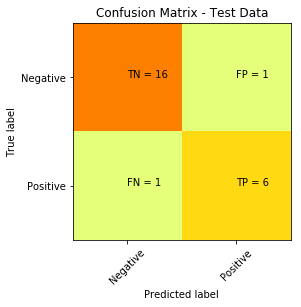

In [216]:
plt.clf()
plt.imshow(ex_cm_tree, 
           interpolation='nearest', 
           cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(ex_cm_tree[i][j]))
plt.show()

#### Question 11
##### Calculate the metrics `fpr` and `tpr` for ROC and calculate AUC.
##### Plot `ROC` using the metrics calculated.

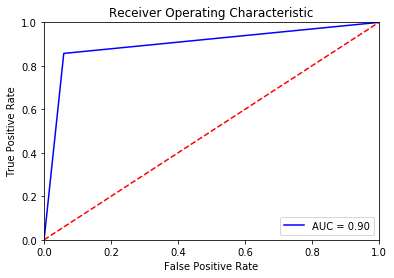

In [217]:
# Calculate metrics for ROC (fpr, tpr) and calculate AUC.
ex_fpr, ex_tpr, ex_threshold = metrics.roc_curve(ex_y_test, ex_y_predict)
ex_roc_auc = metrics.auc(ex_fpr, ex_tpr)

# Plot ROC.
plt.title('Receiver Operating Characteristic')
plt.plot(ex_fpr,
         ex_tpr, 
         'b',
         label = 'AUC = %0.2f' % ex_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], 
         [0, 1],
         'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Question 12
##### Load the pickled dataframe `ex_model_log_penalty.sav` that we created in the last class and save as `ex_model_final_tree`.
##### Append the accuracy `ex_acc_score` obtained above to the dataframe.

In [218]:
ex_model_final_tree = pickle.load(open("ex_model_log_penalty.sav","rb"))
# Add this final model champion to our dataframe.
ex_model_final_tree = ex_model_final_tree.append(
    {'metrics' : "accuracy" ,
     'values' : round(ex_acc_score,4),
     'model':'tree_simple_subset' 
    },
ignore_index = True
)
print(ex_model_final_tree)

    metrics  values                 model
0  accuracy  0.8333                 knn_5
1  accuracy  0.9359      knn_GridSearchCV
2  accuracy  0.9583                knn_27
3  accuracy  1.0000              logistic
4  accuracy  1.0000  logistic_withdummies
5  accuracy  1.0000        logistic_tuned
6  accuracy  0.9167    tree_simple_subset


## Exercise 2

#### Question 1

##### Now, let's run the tree on the whole exercise dataset.

##### As we did before, split the dataset into `ex_X` and  `ex_y`. Set random seed to 2, and use train_test_split().

##### Save target variable `income` as an np array to `ex_y`.
##### Save the rest of the variables to `ex_X`.
##### Then, create the decision tree, save it as ex_clf. Fit it to ex_X_train and ex_y_train and label it as 'ex_clf_fit'.
##### Run the predict() function and save it as 'ex_y_predict'. Then, compute the test model accuracy score, and save it as 'ex_tree_accuracy_score'.


In [219]:
chicago_census.shape

(78, 7)

In [220]:
# Separate target from data.
ex_y3 = np.array(chicago_census['income'])
# Split the predictors from data.
ex_X3 = chicago_census.drop('income', axis = 1)

# Set the seed.
np.random.seed(2)
# Split data into training and test set, use a 70 train - 30 test split.
ex_X_train3, ex_X_test3, ex_y_train3, ex_y_test3 = train_test_split(ex_X3,ex_y3,test_size = .3)

In [221]:
# Set up decision tree model.
ex_clf3 = tree.DecisionTreeClassifier()
print(ex_clf3)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [222]:
# Fit the model.
ex_clf_fit3 = ex_clf3.fit(ex_X_train3, ex_y_train3)

In [223]:
ex_clf_fit3

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [224]:
# Predict on X_test.
ex_y_predict3 = ex_clf_fit3.predict(ex_X_test3)
print(ex_y_predict3)
print(ex_y_test3)

[0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
[0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1]


In [225]:

# Compute test model accuracy score.
ex_tree_accuracy_score3 = metrics.accuracy_score(ex_y_test3, ex_y_predict3)
print("Accuracy on test data: ", ex_tree_accuracy_score3)

Accuracy on test data:  0.9583333333333334


#### Question 2
##### Append the accuracy `ex_tree_accuracy_score` to the dataframe `ex_model_final_tree`.
##### Print the results.

In [226]:
# Add this final model champion to our dataframe.
ex_model_final_tree = ex_model_final_tree.append(
    {'metrics' : "accuracy" ,
     'values' : round(ex_tree_accuracy_score3,4),
     'model':'full_tree_simple_subset' 
    },
ignore_index = True
)
print(ex_model_final_tree)

    metrics  values                    model
0  accuracy  0.8333                    knn_5
1  accuracy  0.9359         knn_GridSearchCV
2  accuracy  0.9583                   knn_27
3  accuracy  1.0000                 logistic
4  accuracy  1.0000     logistic_withdummies
5  accuracy  1.0000           logistic_tuned
6  accuracy  0.9167       tree_simple_subset
7  accuracy  0.9583  full_tree_simple_subset


#### Question 3
##### Let's check for highly correlated variables in our dataset.
##### We do not run cross-validation as the dataset has only 78 rows. Hence, the test set would be too small for accurate results. 
##### There's also no abnormal increase in our accuracy, which leads us to believe that there's no need for cross-validation.
##### Check the shape of our dataset `chicago_census`.
##### Drop `income` from `chicago_census` and save to a new variable named `chicago_hc`.

In [227]:
print(chicago_census.shape)
chicago_hc = chicago_census.drop('income', axis = 1)


(78, 7)


#### Question 4
##### Create a correlation_matrix of `chicago_hc` named `ex_corr_matrix`.
##### Select upper triangle of correlation matrix `ex_corr_matrix`. Name as `ex_upper`.
##### Find features with correlation greater than `0.85` and save to `ex_to_drop`.
##### Drop the features from `chicago_census`.

In [228]:
# Create correlation matrix.
ex_corr_matrix = chicago_hc.corr().abs()
# Select upper triangle of correlation matrix.
ex_upper = ex_corr_matrix.where(np.triu(np.ones(ex_corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.7.
ex_to_drop = [column for column in ex_upper.columns if any(ex_upper[column] > 0.85)]
print(ex_to_drop)
# Drop the features we identified.
chicago_census = chicago_census.drop(chicago_census[ex_to_drop], axis=1)
print(chicago_census.shape)

['percent_25_without_diploma']
(78, 6)


#### Question 5
##### Pickle the dataframe `chicago_census` for use in future sessions.
##### Save as `chicago_no_hc.sav`.


In [229]:
pickle.dump(chicago_census, open('chicago_census.sav', 'wb'))

## Exercise 3

##### Now let's try to optimize the tree by tuning the parameters.
##### We will optimize the tree on the four parameters below:
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

#### Question 1
##### Build a function named `ex_optimal_parameter` that will allow us to store the parameters we will be using in our optimized tree.
##### The inputs for the function will be `values` and `test_results`, and the output of the function will be `ex_best_value`. 


In [230]:
def df_target_split(df, target, s = 2, ts = .3):
    
    # Separate target from data.
    ex_y = np.array(df[f'{target}'])
    # Split the predictors from data.
    ex_x = df.drop(f'{target}', axis = 1)

    # Set the seed.
    np.random.seed(s)
    
    # Split data into training and test set
    ex_X_train, ex_X_test, ex_y_train, ex_y_test = train_test_split(ex_x, ex_y, test_size = ts)
    
    return ex_X_train, ex_X_test, ex_y_train, ex_y_test

In [231]:
# Define function that will determine the optimal number for each parameter.
def ex_optimal_parameter(values,test_results):
    best_test_value = max(test_results)
    best_test_index = test_results.index(best_test_value)
    ex_best_value = values[best_test_index]
    return(ex_best_value)

In [232]:
# define function to optimize model
def model_optimizer(df, target, optimizer, o_param):
    # intiate empty lists
    train_results = []
    test_results = []
    
    # call function to split train and test data, specify income
    X_train, X_test, Y_train, Y_test = df_target_split(df, target)
    
    for i in optimizer:
        
        # pass o_param as dictionary key and i as value
        params = { o_param : i}
        
        # pass and unpack params dictionary as specified parameter
        dt = DecisionTreeClassifier(**params)
        
        # fit data
        dt.fit(X_train, Y_train)
        train_pred = dt.predict(X_train)
        acc_train = accuracy_score(Y_train, train_pred)

        # Add AUC score to previous train results
        train_results.append(acc_train)
        y_pred = dt.predict(X_test)
        acc_test = accuracy_score(Y_test, y_pred)

        # Add AUC score to previous test results
        test_results.append(acc_test)

    #plot the results
    plot_results(optimizer, train_results, test_results, o_param)

    # return optimal parameter.
    return ex_optimal_parameter(optimizer, test_results)

In [234]:
# define function for plotting
def plot_results(optimizer, train_results, test_results, o_param):
    line1, = plt.plot(optimizer,
                      train_results, 
                      'b', 
                      label = "Train accuracy")
    line2, = plt.plot(optimizer, 
                      test_results, 
                      'r', 
                      label = "Test accuracy")
    plt.legend(handler_map={line1: HandlerLine2D(numpoints = 2)})
    plt.ylabel('Accuracy')
    plt.xlabel(o_param)
    plt.show()

#### Question 2
##### Optimize `max depth` by ranging it from 1 to 32.
##### Name the optimized max_depth as `ex_optimal_max_depth`. 

In [235]:
ex_max_depths = np.linspace(1, chicago_census.shape[0], chicago_census.shape[0], endpoint = True)

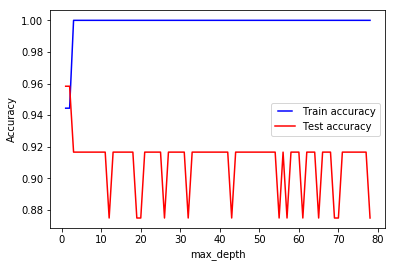

1.0

In [236]:
ex_optimal_max_depth = model_optimizer(chicago_census, 'income', ex_max_depths, 'max_depth')
ex_optimal_max_depth

#### Question 3 
##### Plot the max depth by `train_results` and `test_results`, and label them as `Train accuracy` and `Test accuracy`. 
##### Assign the xlabel as `Tree depth` and the ylabel as `Accuracy`.

In [237]:
print('^see above^')

^see above^


#### Question 4
##### Optimize the `ex_min_samples_split` parameter by ranging it from 10% to 100% of the samples.
##### Name the optimized `ex_min_samples_split` as `ex_optimal_min_samples_split`. 

In [238]:
ex_min_samples_splits = np.linspace(0.1, 0.5, 5, endpoint = True)

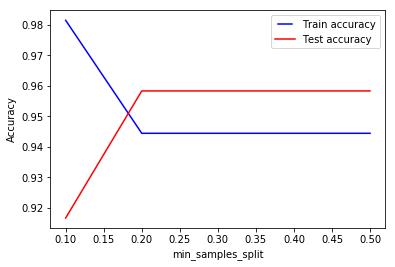

0.2

In [239]:
ex_optimal_min_samples_split = model_optimizer(chicago_census, 'income', ex_min_samples_splits, 'min_samples_split')
ex_optimal_min_samples_split

#### Question 5
##### Plot the `ex_min_samples_split` by `train_results` and `test_results`, and label them as `Train accuracy` and `Test accuracy`. 
##### Assign the xlabel as `ex_min samples split` and the ylabel as `Accuracy`.

In [240]:
print('^see above^')

^see above^


#### Question 6
##### Optimize `ex_min_samples_leaf` by ranging it from 0.1 to 0.5.
##### Name the optimized `ex_min_samples_leaf` as `ex_optimal_min_samples_leaf`. 

In [241]:
ex_min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint = True)

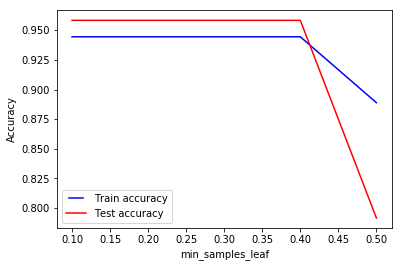

0.1

In [242]:
ex_optimal_min_samples_leafs = model_optimizer(chicago_census, 'income', ex_min_samples_leafs, 'min_samples_leaf')
ex_optimal_min_samples_leafs

#### Question 7
##### Plot the `ex_min samples leaf` by `train_results` and `test_results`, and label them as `Train accuracy` and `Test accuracy`. 
##### Assign the xlabel as `min samples leaf` and the ylabel as `Accuracy`.

In [243]:
print('^see above^')

^see above^


#### Question 8
##### Optimize `ex_max_features`. 
##### Name the optimized `ex_max_features` as `ex_optimal_max_features`. 

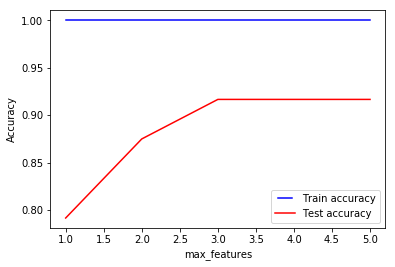

3

In [244]:
max_features = list(range(1, chicago_census.shape[1]))
ex_optimal_max_features = model_optimizer(chicago_census, 'income', max_features, 'max_features')
ex_optimal_max_features

#### Question 9
##### Plot the `ex_max features` by `train_results` and `test_results`, and label them as `Train accuracy` and `Test accuracy`. 
##### Assign the xlabel as `max features` and the ylabel as `Accuracy`.

In [245]:
print('^see above^')

^see above^


#### Question 10
##### Print the four optimal parameters in the form of  "The optimal `parameter` is: `parameter value`" like we did in class. 
#####  Take a look at the optimized parameter values.

In [246]:
print("The optimal max depth is:", ex_optimal_max_depth)
print("The optimal min samples split is:", ex_optimal_min_samples_split)
print("The optimal min samples leaf is:", ex_optimal_min_samples_leafs)
print("The optimal max features is:", ex_optimal_max_features)

The optimal max depth is: 1.0
The optimal min samples split is: 0.2
The optimal min samples leaf is: 0.1
The optimal max features is: 3


#### Question 11

##### Create a tree model with the optimized parameters. 
##### Name the optimized model as `ex_clf_optimized`. 
##### Print the optimized model to see the optimized features.
##### Run the optimized model on `X_train` and name the fitted model as `ex_clf_optimized_fit`.


##### Remember to set the seed at 2. 

In [247]:
X_train, X_test, Y_train, Y_test = df_target_split(chicago_census, 'income')
# Set the seed.
np.random.seed(2)

# Implement the decision tree on X_train.
ex_clf_optimized = tree.DecisionTreeClassifier(max_depth = ex_optimal_max_depth,
                                            min_samples_split = ex_optimal_min_samples_split,
                                            min_samples_leaf = ex_optimal_min_samples_leafs,
                                            max_features = ex_optimal_max_features)

# We can now see our optimized features where before they were just default:
print(ex_clf_optimized)

ex_clf_optimized_fit = ex_clf_optimized.fit(X_train, Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1.0,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=0.1,
            min_samples_split=0.2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


#### Question 12
##### Predict on X_test and calculate the accuracy score. 
##### Name the accuracy score as `ex_acc_score_tree_optimized`.


In [248]:
# Predict on X_test.
ex_y_predict_optimized = ex_clf_optimized_fit.predict(X_test)

# Get the accuracy score.
ex_acc_score_tree_optimized = accuracy_score(Y_test, ex_y_predict_optimized)

print(ex_acc_score_tree_optimized)

0.9583333333333334


#### Question 13 
##### Add the optimized tree accuracy score in the dataset. 
##### Remember to pickle the dataframe as `ex_model_final.sav` for later use.

In [249]:
# Add this final model champion to our dataframe.
ex_model_final_tree = ex_model_final_tree.append(
    {'metrics' : "accuracy" ,
     'values' : round(ex_acc_score_tree_optimized,4),
     'model':'full_tree_optimized_subset' 
    },
ignore_index = True
)
print(ex_model_final_tree)

    metrics  values                       model
0  accuracy  0.8333                       knn_5
1  accuracy  0.9359            knn_GridSearchCV
2  accuracy  0.9583                      knn_27
3  accuracy  1.0000                    logistic
4  accuracy  1.0000        logistic_withdummies
5  accuracy  1.0000              logistic_tuned
6  accuracy  0.9167          tree_simple_subset
7  accuracy  0.9583     full_tree_simple_subset
8  accuracy  0.9583  full_tree_optimized_subset


In [250]:
pickle.dump(ex_model_final_tree, open('ex_model_final.sav', 'wb'))